In [19]:
import sys
sys.path.append("../python")

from importlib import reload
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.patches as pt
import utility_functions
import meshio
import evaluations
import json
import create_structured_mesh as msh

In [20]:
parameters_path = "../configs/test_01/mh.json"
    
file = open(parameters_path)
config = json.load(file)
file.close()

In [21]:
# Set center
center = (config["Geometry"]["Center"]["x"], config["Geometry"]["Center"]["y"])

# Set type
dipole_type = config["ModelConfig"]["DipoleType"]

# Set dipole
#position = (config["ModelConfig"]["Dipole"]["Position"]["x"],config["ModelConfig"]["Dipole"]["Position"]["y"])
#start = (config["Sampling"]["StartPoint"]["x"],config["Sampling"]["StartPoint"]["y"])

sample_path = config["Setup"]["OutputPath"] + config["Sampling"]["ResultFile"] + ".h5"
#fin = h5py.File(sample_path)
fin = h5py.File("/home/anne/Masterarbeit/masterarbeit/2d/results/test_mlda/mlda_meshes_0.h5")
samples = np.array( fin['/samples'] )[:,:]
fin.close()

n = len(samples[0])

if dipole_type == 'Radial':
    #s_ref = utility_functions.get_radial_dipole(position,center)
    sample_dict = {
        "x": samples[0],
        "y": samples[1]
    }
else:
    #rho = config["ModelConfig"]["Dipole"]["Orientation"]["rho"]
    #s_ref = utility_functions.get_dipole(position,center,rho)
    sample_dict = {
        "x": samples[0],
        "y": samples[1],
        "rho": samples[2]
    }

sample_dataset = az.dict_to_dataset(sample_dict)

In [22]:
# from os import name
# reload(evaluations)

# fig, axis = plt.subplots(1, 1, figsize=(20,5))

# N = 256
# mesh = msh.StructuredMesh(N)
    
# g = np.ndarray((N,N),float)

# x = mesh.nodes[:N,0]
# y = mesh.nodes[:N,0]

# for k in range(N):
#     for j in range(N):
#         g[k,j] = mesh.gray_probs[k+N*j]

# axis.pcolormesh(x,y,g)
# axis.set_aspect(1)

# evaluations.draw_point(axis, start, alpha=1, facecolor='black')
# evaluations.draw_point(axis, position, alpha=1)

# plt.show()

In [23]:
#n_split = int(len(samples[0])/2)
#print("Effective sample size: " + str(az.ess(np.array([samples[0,:n_split],samples[0,n_split:]]))))

print("")
print("Effective sample size: " + str(az.ess(sample_dataset)))
print("Autocorrelation time: " + str(n/az.ess(sample_dataset)))


Effective sample size: <xarray.Dataset>
Dimensions:  ()
Data variables:
    x        float64 3.503
    y        float64 17.32
    rho      float64 6.071
Autocorrelation time: <xarray.Dataset>
Dimensions:  ()
Data variables:
    x        float64 456.8
    y        float64 92.38
    rho      float64 263.6


In [24]:
print("")
print("Effective sample size: " + str(az.ess(samples[0][:int(n/2)])) + " " + str(az.ess(samples[0][int(n/2):])))
print("Effective sample size: " + str(az.ess(samples[1][:int(n/2)])) + " " + str(az.ess(samples[1][int(n/2):])))
print("Effective sample size: " + str(az.ess(samples[2][:int(n/2)])) + " " + str(az.ess(samples[2][int(n/2):])))




Effective sample size: 2.9619931247544806 13.179187718371246
Effective sample size: 7.241519725097042 12.479082277397499
Effective sample size: 37.13940173814933 15.285711143726553


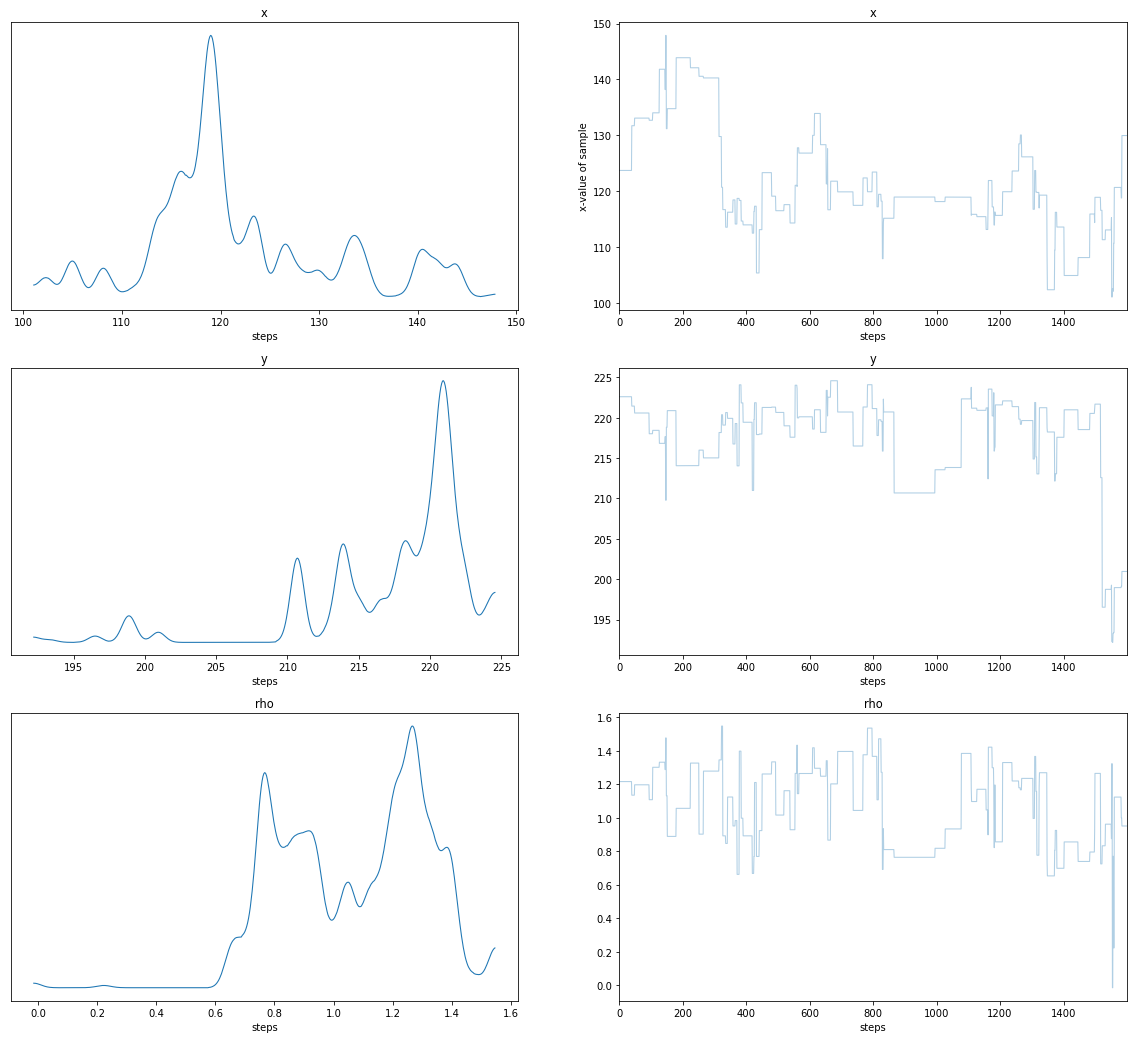

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(20,18))

for ax in axes.flatten():
    ax.set_xlabel('steps')

axes[0,1].set_ylabel('x-value of sample')
#axes[0,1].set_ylim(60,130)

p = az.plot_trace(sample_dataset, axes=axes)



Text(0.5, 0, 'lag')

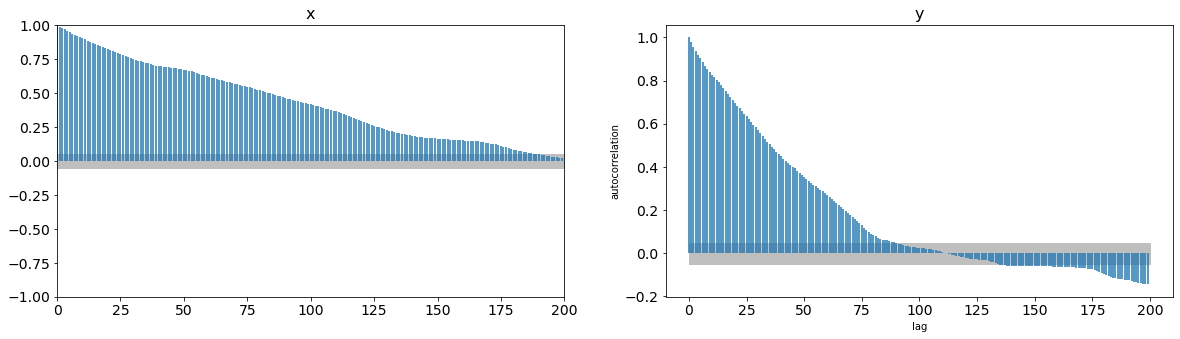

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))

p = az.plot_autocorr(sample_dataset, ax = axes, max_lag=200, combined=True, figsize=(20,4))

axes[1].set_ylabel('autocorrelation')
axes[1].set_xlabel('lag')


In [27]:
#p = az.plot_ess(sample_dataset, kind='local')
#p = az.plot_ess(sample_dataset, kind='quantile')

#fig, axes = plt.subplots(1, 2, figsize=(20,5))
#p = az.plot_ess(sample_dataset, kind='evolution', ax=axes, extra_kwargs={"color": "lightsteelblue"})
#p = az.plot_ess(sample_dataset_1, kind='evolution', ax=axes, extra_kwargs={"color": "lightsteelblue"})
